In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
# 准备数据集
data_path='E:\PyProjects\DataSet\FireAI/data_multivar_2_class.txt'
df=pd.read_csv(data_path,header=None)
# print(df.head()) # 没有问题
print(df.info()) # 查看数据信息，确保没有错误
dataset_X,dataset_y=df.iloc[:,:-1],df.iloc[:,-1]
# print(dataset_X.head())
# print(dataset_X.info())
# print(dataset_y.head()) # 检查没问题
dataset_X=dataset_X.values
dataset_y=dataset_y.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
0    300 non-null float64
1    300 non-null float64
2    300 non-null int64
dtypes: float64(2), int64(1)
memory usage: 7.1 KB
None


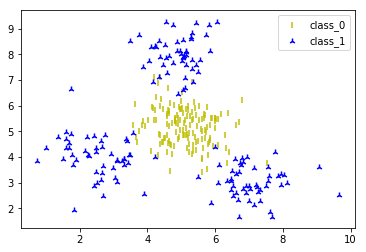

In [12]:
# 数据集可视化
def visual_2D_dataset(dataset_X,dataset_y):
    '''将二维数据集dataset_X和对应的类别dataset_y显示在散点图中'''
    assert dataset_X.shape[1]==2,'only support dataset with 2 features'
    plt.figure()
    classes=list(set(dataset_y)) 
    markers=['.',',','o','v','^','<','>','1','2','3','4','8'
             ,'s','p','*','h','H','+','x','D','d','|']
    colors=['b','c','g','k','m','w','r','y']
    for class_id in classes:
        one_class=np.array([feature for (feature,label) in 
                   zip(dataset_X,dataset_y) if label==class_id])
        plt.scatter(one_class[:,0],one_class[:,1],marker=np.random.choice(markers,1)[0],
                    c=np.random.choice(colors,1)[0],label='class_'+str(class_id))
    plt.legend()
    
visual_2D_dataset(dataset_X,dataset_y)

In [11]:
# 从数据集的分布就可以看出，这个数据集不可能用直线分开
# 为了验证我们的判断，下面还是使用SVM来构建线性分类器将其分类

# 将整个数据集划分为train set和test set
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y=train_test_split(
    dataset_X,dataset_y,test_size=0.25,random_state=42)

# print(train_X.shape)  # (225, 2)
# print(train_y.shape)  # (225,)
# print(test_X.shape)  # (75, 2)

# 使用线性核函数初始化一个SVM对象。
from sklearn.svm import SVC
classifier=SVC(kernel='linear') # 构建线性分类器
classifier.fit(train_X,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
# 将分类器绘制到图中
def plot_classifier(classifier, X, y):
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0 # 计算图中坐标的范围
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0
    step_size = 0.01 # 设置step size
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
                                     np.arange(y_min, y_max, step_size))
    # 构建网格数据
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    mesh_output = mesh_output.reshape(x_values.shape) 
    plt.figure()
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', 
                linewidth=1, cmap=plt.cm.Paired)
    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])), int(max(X[:, 0])), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])), int(max(X[:, 1])), 1.0)))

    plt.show()



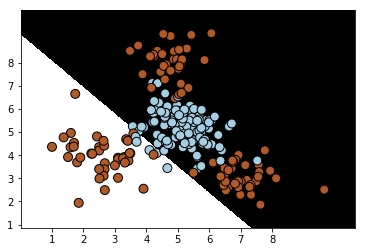

             precision    recall  f1-score   support

    Class-0       0.60      0.96      0.74       114
    Class-1       0.89      0.35      0.50       111

avg / total       0.74      0.66      0.62       225



In [14]:
# 模型在训练集上的性能报告：
from sklearn.metrics import classification_report
plot_classifier(classifier,train_X,train_y)  # 分类器在训练集上的分类效果
target_names = ['Class-0', 'Class-1']
y_pred=classifier.predict(train_X)
print(classification_report(train_y, y_pred, target_names=target_names))

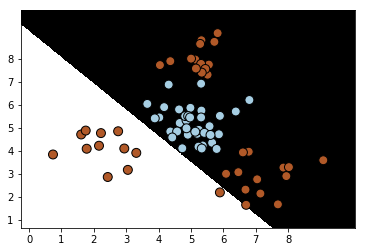

             precision    recall  f1-score   support

    Class-0       0.57      1.00      0.73        36
    Class-1       1.00      0.31      0.47        39

avg / total       0.79      0.64      0.59        75



In [7]:
# 分类器在测试集上的分类效果
plot_classifier(classifier,test_X,test_y)  

target_names = ['Class-0', 'Class-1']
y_pred=classifier.predict(test_X)
print(classification_report(test_y, y_pred, target_names=target_names))

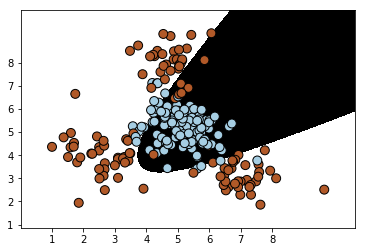

             precision    recall  f1-score   support

    Class-0       0.92      0.85      0.89       114
    Class-1       0.86      0.93      0.89       111

avg / total       0.89      0.89      0.89       225



In [8]:
# 从上面的性能报告中可以看出，分类效果并不好
# 故而我们使用SVM建立非线性分类器，看看其分类效果
# 使用SVM建立非线性分类器主要是使用不同的核函数
# 第一种：使用多项式核函数：
classifier_poly=SVC(kernel='poly',degree=3) # 三次多项式方程
classifier_poly.fit(train_X,train_y)

# 在训练集上的表现为：
plot_classifier(classifier_poly,train_X,train_y)  

target_names = ['Class-0', 'Class-1']
y_pred=classifier_poly.predict(train_X)
print(classification_report(train_y, y_pred, target_names=target_names))

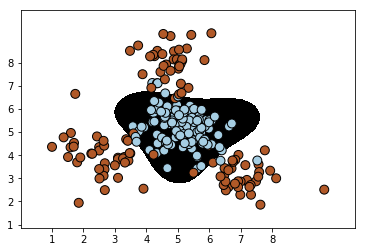

             precision    recall  f1-score   support

    Class-0       0.96      0.96      0.96       114
    Class-1       0.96      0.95      0.96       111

avg / total       0.96      0.96      0.96       225



In [9]:
# 第二种：使用径向基函数建立非线性分类器
classifier_rbf=SVC(kernel='rbf') 
classifier_rbf.fit(train_X,train_y)

# 在训练集上的表现为：
plot_classifier(classifier_rbf,train_X,train_y)  

target_names = ['Class-0', 'Class-1']
y_pred=classifier_rbf.predict(train_X)
print(classification_report(train_y, y_pred, target_names=target_names))